# Codeathon 1 — Predicting Boston Housing Prices

by Ryan Gibiser (rmg5ft)

# 1. Setup

In [1246]:
# Library imports
import sklearn
import numpy as np
import pandas as pd
import os

# random seed to make this notebook's output stable across runs
SEED = 49
np.random.seed(SEED)

# 2. Getting the Data

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are deﬁned as follows (taken from the UCI Machine Learning Repository1)

**Description of the Data Columns:**

*   CRIM - per capita crime rate by town
*   ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
*   INDUS - proportion of non-retail business acres per town
*   CHAS - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
*   NOX - nitric oxide concentration (parts per 10 million)
*   RM - average number of rooms per dwelling
*   AGE - proportion of owner-occupied units built prior to 1940
*   DIS - weighted distances to five Boston employment centres
*   RAD - index of accessibility to radial highways
*   TAX - full-value property-tax rate per \$10,000
*   PTRATIO - pupil-teacher ratio by town
*   B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
*   LSTAT - % lower status of the population
*   MEDV - Median value of owner-occupied homes in \$1000's (Target Value)



In [1247]:
# Get housing.csv file from raw GitHub link
URL = 'https://raw.githubusercontent.com/rgibiser/housing/master/housing.csv'

# Load housing.csv into a pandas object called housing
housing = pd.read_csv(URL, delim_whitespace=True)
housing.head(10) # preview the data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [1248]:
# Provide a quick summary of the data including name of features, count, and type
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [1249]:
# Display basic overview of the stats of the dataset
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


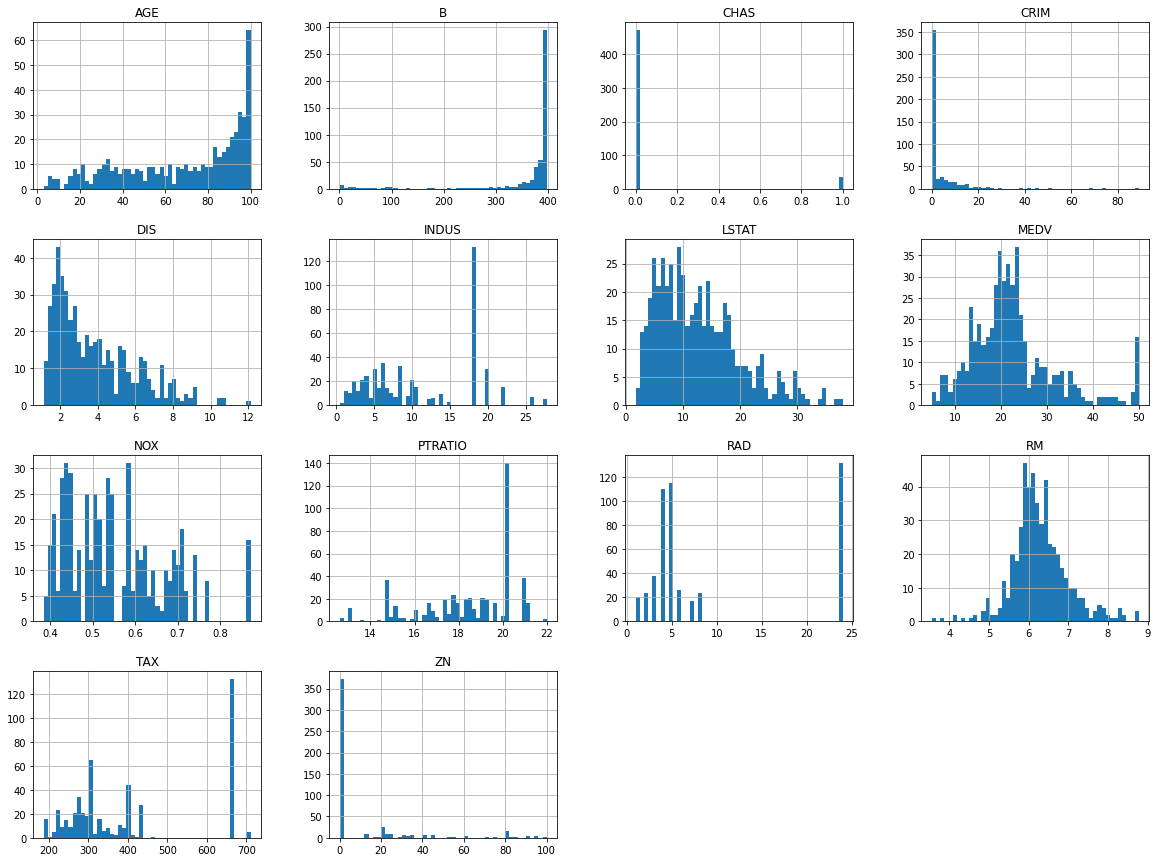

In [1250]:
# Histograms of each data column
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()
# Observe each feature and decide which one to use

In [1251]:
# Split the data into training/test sets (80/20)
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=SEED)

In [1252]:
# Verify training and test set sizes
print(train_set.shape) # 404/505 = 80%
print(test_set.shape)  # 102/505 = 20%

(404, 14)
(102, 14)


In [1253]:
# Transform LSTAT atrribute to divide bins into a more bell-shaped distribution
housing['LSTAT_cat'] = pd.cut(housing['LSTAT'],
                               bins=[0., 4.0, 7.0, 15.0, 20., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [1254]:
housing['LSTAT_cat'].value_counts()

3    217
2     94
4     88
5     74
1     33
Name: LSTAT_cat, dtype: int64

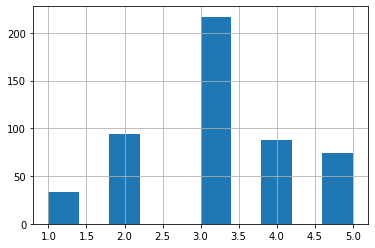

In [1255]:
housing["LSTAT_cat"].hist()

In [1256]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=SEED)
for train_index, test_index in split.split(housing, housing["LSTAT_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [1257]:
strat_test_set["LSTAT_cat"].value_counts() / len(strat_test_set)

3    0.431373
2    0.186275
4    0.176471
5    0.147059
1    0.058824
Name: LSTAT_cat, dtype: float64

In [1258]:
housing["LSTAT_cat"].value_counts() / len(housing)

3    0.428854
2    0.185771
4    0.173913
5    0.146245
1    0.065217
Name: LSTAT_cat, dtype: float64

This verifies that the stratified sampling of the dataset worked.

# 3. Discovering and Visualizing the Data

In [1259]:
# drop this feature now that we have stratified the dataset
for set_ in (strat_train_set, strat_test_set):
    set_.drop("LSTAT_cat", axis = 1, inplace=True)

In [1260]:
# Make a copy of the stratified train set
housing = strat_train_set.copy()

In [1261]:
# Use corr() to see the correlations among the features of the dataset
corr_matrix = housing.corr()
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.667598
ZN         0.352569
B          0.325143
DIS        0.258584
CHAS       0.169955
RAD       -0.371645
CRIM      -0.375627
AGE       -0.397733
NOX       -0.450178
TAX       -0.463463
INDUS     -0.483738
PTRATIO   -0.499172
LSTAT     -0.745984
Name: MEDV, dtype: float64

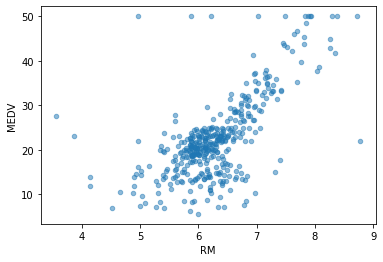

In [1262]:
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.5)

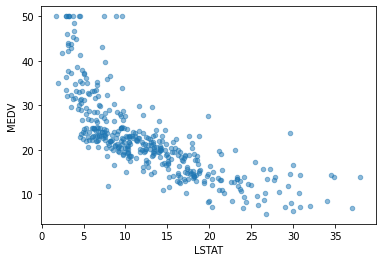

In [1263]:
housing.plot(kind="scatter", x="LSTAT", y="MEDV", alpha=0.5)

Drop a couple of features.

In [1264]:
housing = housing.drop("CHAS", axis=1)
housing = housing.drop("B", axis=1)

## Feature Engineering - add new features to dataset

In [1265]:
housing["LSTAT_weighted_PTRATIO"] = housing["PTRATIO"] / housing["LSTAT"]
housing["LSTAT_weighted_RM"] = housing["RM"] / housing["LSTAT"]
housing["CRIM_weighted_TAX"] = housing["TAX"] / housing["CRIM"]

In [1266]:
housing.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,LSTAT_weighted_PTRATIO,LSTAT_weighted_RM,CRIM_weighted_TAX
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.356037,10.909653,11.318837,0.556034,6.289715,68.472772,3.760481,9.504950,409.930693,18.447525,12.607748,22.519802,2.019761,0.746827,2932.263553
std,7.605366,22.748051,6.944661,0.115756,0.707568,28.136432,2.090573,8.718793,168.621223,2.194267,7.180146,9.165482,1.268280,0.590564,4905.805024
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.600000,0.497799,0.108981,7.485148
25%,0.082155,0.000000,5.190000,0.449000,5.890500,44.850000,2.097050,4.000000,283.250000,16.900000,6.915000,16.500000,1.157561,0.360021,155.503987
50%,0.262660,0.000000,9.690000,0.538000,6.209000,76.700000,3.100850,5.000000,335.000000,19.100000,10.990000,21.200000,1.653616,0.557376,1300.173068
75%,3.594927,12.500000,18.100000,0.624000,6.643750,94.300000,5.234500,24.000000,666.000000,20.200000,16.910000,25.000000,2.547773,0.938682,3552.426758
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000,9.242424,4.328902,46835.443038


In [1267]:
corr_matrix = housing.corr()
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV                      1.000000
LSTAT_weighted_RM         0.815510
LSTAT_weighted_PTRATIO    0.755180
RM                        0.667598
ZN                        0.352569
DIS                       0.258584
CRIM_weighted_TAX         0.244001
RAD                      -0.371645
CRIM                     -0.375627
AGE                      -0.397733
NOX                      -0.450178
TAX                      -0.463463
INDUS                    -0.483738
PTRATIO                  -0.499172
LSTAT                    -0.745984
Name: MEDV, dtype: float64

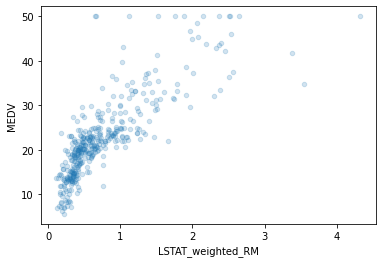

In [1268]:
housing.plot(kind="scatter", x="LSTAT_weighted_RM", y="MEDV", alpha=0.2)
plt.show()

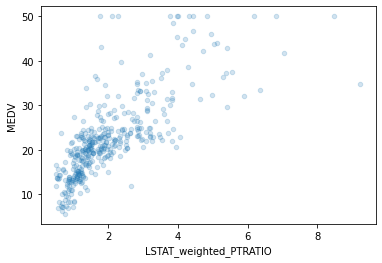

In [1269]:
housing.plot(kind="scatter", x="LSTAT_weighted_PTRATIO", y="MEDV", alpha=0.2)
plt.show()

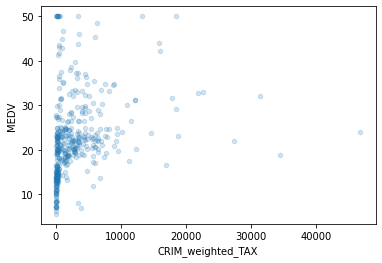

In [1270]:
housing.plot(kind="scatter", x="CRIM_weighted_TAX", y="MEDV", alpha = 0.2)
plt.show()

It seems that these added features could useful based on these graphs.

Drop the features we just added now and let the pipeline add them in automatically later in the next section.

In [1271]:
housing = housing.drop("LSTAT_weighted_PTRATIO", axis=1)
housing = housing.drop("LSTAT_weighted_RM", axis=1)
housing = housing.drop("CRIM_weighted_TAX", axis=1)

# 4. Data Cleaning

In [1272]:
# Create the features and labels for training
housing = strat_train_set.drop("MEDV", axis=1) # drop labels for training set
housing_labels = strat_train_set["MEDV"].copy()

In [1273]:
from sklearn.base import BaseEstimator, TransformerMixin

crim_idx, rm_idx, tax_idx, ptratio_idx, lstat_idx, = 0, 4, 8, 9, 10

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_lstat_weighted_rm = True): # no *args or **kargs
        self.add_lstat_weighted_rm = add_lstat_weighted_rm
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        if (self.add_lstat_weighted_rm):
          lstat_weighted_ptratio = X[:, ptratio_idx] / X[:, lstat_idx]
          lstat_weighted_rm = X[:, rm_idx] / X[:, lstat_idx]
          crim_weighted_tax = X[:, tax_idx] / X[:, crim_idx]
          return np.c_[X, lstat_weighted_ptratio, lstat_weighted_rm, crim_weighted_tax]
        else:
          return np.c_[X]

# When set to false, that features will not be added
attr_adder = CombinedAttributesAdder(add_lstat_weighted_rm=True)
housing_extra_attribs = attr_adder.transform(housing.values)

Create a data pipeline:

In [1274]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()), # include added features
        ('std_scaler', StandardScaler()),
    ])

housing_prepared = pipeline.fit_transform(housing)

In [1275]:
housing_prepared

array([[ 2.82330326, -0.48018094,  0.97766779, ...,  1.39349944,
         0.51693074, -0.72321618],
       [ 0.61038378, -0.48018094,  0.97766779, ...,  1.39349944,
         0.56368646, -0.67989113],
       [-0.11971606, -0.48018094,  1.19104538, ...,  0.68487372,
         3.88257008, -0.70031176],
       ...,
       [-0.43438648, -0.48018094,  0.21787054, ..., -0.09725239,
        -0.95885692,  1.14144842],
       [-0.43143754,  3.0409644 , -0.91822097, ..., -1.18442812,
        -1.22367614,  0.33599136],
       [-0.42973663, -0.48018094, -1.04797762, ..., -0.53759425,
         0.03335911,  0.41593573]])

In [1276]:
# Make sure it is the right amount of rows and columns - (404, 16) expected
print(housing_prepared.shape)

(404, 16)


# 5. Selecting and Training a Model

## Simple Linear Regression Model

In [1277]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1278]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse # This is the root mean square error measured in multiple of $1000s

4.670624425216965

Therefore, the RMSE error for the Linear Regression model is $4,813.64 (SEED=11)


## Decision Tree Regressor

In [1279]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=SEED)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=49, splitter='best')

Evaluate this model with 5-fold Cross Validation:

In [1280]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-scores)

In [1281]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [5.78672384 3.64032626 4.18885942 6.02488666 4.53075601]
Mean: 4.834310438153049
Standard deviation: 0.9229207501304031


Without tuning the parameters, the Decision Tree Regressor did not perform much better than the Linear Regression Model.

## Random Forest Regressor

In [1282]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=SEED)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=49, verbose=0, warm_start=False)

In [1283]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [3.47976989 2.39423652 3.14428188 4.00342059 3.93433531]
Mean: 3.391208838100577
Standard deviation: 0.5886525919259382


The Random Forest Regressor performed the best of the three models, without tuning the hyperparameters yet.

# 6. Fine Tuning the model

Randomly search for best hyperparameters for 50 iterations (~ 1 min) and 5-fold cross validation:

In [1284]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=300),
        'max_features': randint(low=1, high=10),
        'bootstrap': randint(low=0, high=1) # False or True
    }

forest_reg = RandomForestRegressor(random_state=SEED)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=50, cv=5, scoring='neg_mean_squared_error', random_state=SEED)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [1285]:
# print all iterations to see results
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

3.3672281996671236 {'bootstrap': 0, 'max_features': 9, 'n_estimators': 183}
3.291535000183419 {'bootstrap': 0, 'max_features': 5, 'n_estimators': 127}
3.646026273109223 {'bootstrap': 0, 'max_features': 2, 'n_estimators': 147}
3.2933372353176145 {'bootstrap': 0, 'max_features': 5, 'n_estimators': 141}
3.994437810578882 {'bootstrap': 0, 'max_features': 1, 'n_estimators': 93}
3.3519719459327106 {'bootstrap': 0, 'max_features': 9, 'n_estimators': 297}
3.251263811823314 {'bootstrap': 0, 'max_features': 5, 'n_estimators': 205}
3.2678789399921317 {'bootstrap': 0, 'max_features': 5, 'n_estimators': 288}
3.306072977490666 {'bootstrap': 0, 'max_features': 6, 'n_estimators': 168}
3.366874098752035 {'bootstrap': 0, 'max_features': 9, 'n_estimators': 162}
3.318760545081672 {'bootstrap': 0, 'max_features': 7, 'n_estimators': 236}
3.2560827892417454 {'bootstrap': 0, 'max_features': 5, 'n_estimators': 181}
3.334414135343575 {'bootstrap': 0, 'max_features': 8, 'n_estimators': 227}
3.343549548661203 {'b

In [1286]:
# display best estimator
rnd_search.best_estimator_

RandomForestRegressor(bootstrap=0, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=205, n_jobs=None, oob_score=False,
                      random_state=49, verbose=0, warm_start=False)

In [1287]:
# display importances for each feature
feature_importances = rnd_search.best_estimator_.feature_importances_
feature_importances # index corresponds to feature

array([0.03914488, 0.00259597, 0.0596625 , 0.00354227, 0.0587827 ,
       0.31737333, 0.0205979 , 0.05238084, 0.00486431, 0.02606128,
       0.05620484, 0.0155879 , 0.2636812 , 0.01216556, 0.03001885,
       0.03733568])

As predicted, LSTAT and RM have the most importance in predicting MEDV values. The added features also have relatively high importance. Now use these hyperameters for the final model:

In [1288]:
final_model = rnd_search.best_estimator_

X_test = strat_test_set.drop("MEDV", axis=1)
y_test = strat_test_set["MEDV"].copy()

X_test_prepared = pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

#7. Presenting the solution

Display the final Root Mean Square Error for the model:

In [1289]:
final_rmse

2.5494244406981568

Also compute and display the Mean Absolute Error for model:

In [1290]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_test, final_predictions)
lin_mae

1.8722333811573382

The final RMSE error for my model ended up being 2.54942 (\$2,549.42), and the final MAE error ended up to be 1.87223 (\$1,872.23). Before tuning the hyperparameters, the RMSE for the best performing model (Random Forest Regressor with 5-fold Cross Validation) was 3.39121. This is a 24.8\% decrease just from tuning the hyperparameters alone. These were tuned with a randomized deep search of the parameters over 50 iterations, which took the most computation time. Originally when evaluating the model I had not done any feature engineering – when I tried to add one feature at a time it did not perform as well as just the original features alone. Only when I combined all three of my proposed added features did the RMSE error begin to drop. I chose to manipulate features that were all highly correlated to the median house value (MEDV): RM, LSTAT, PTRATIO, TAX, and CRIM. After engineering these features the RMSE dropped another ~8\%.

Many assumptions were made from the dataset, such as choosing very different and specific features to predict housing values. There were also some other limitations in the data. From a relatively small dataset, the model didn't perform too poorly but it definitely could be improved with more data. My model didn't overfit the data because it performed better on the test set, and a better ML model could possibly lower the RMSE even more.